<a href="https://colab.research.google.com/github/vovac12/BEST-2019/blob/Task-2/Task-2/%5BBEST2019%5DBaseline_and_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np
import json
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import keras
import tensorflow as tf
import scipy
import getpass
import urllib
import socket
import tqdm
from matplotlib import cm

In [2]:
TEAM_KEY = getpass.getpass("TEAM_KEY: ")

TEAM_KEY: ········


In [138]:
def bytelen(obj):  
    if type(obj) == str:
        obj = obj.encode()
    size = len(bytes(obj))
    return bytes((size % (256 ** i) // 256**(i-1) for i in range(1, 5)))

def byte_count(x):
    x = list(x)
    return sum((x[i] * 256**i for i in range(len(x))))

def connect_to_server(url, port):
    sock = socket.socket()
    sock.connect((url, port))
    return sock

def send_data(sock, data):
    if type(data) == str:
        data = data.encode()
    data = bytes(data)
    return sock.send(bytelen(data) + data)

def recv_data(sock):
    if type(sock) == socket.socket:
        reader = sock.recv
        buff = 1000000
    else:
        reader = sock.read
        buff = 100000
    l = reader(4)
    l = byte_count(l)
    res = []
    cnt = 0
    while cnt < l:
        tmp = list(reader(buff if l - cnt > buff else l - cnt))
        cnt += len(tmp)
        res.extend(tmp)
    res = bytes(res)
    if not res:
        return None
    return json.loads(res)


def dict_to_bytes(data):
    return json.dumps(data).encode()

def get_start_msg(task):
    return dict_to_bytes({'team': TEAM_KEY, 'task': task})

In [139]:
task = 1
start_msg = get_start_msg(task)

In [151]:
conn = open('Data/task1', 'rb') #connect_to_server('besthack19.sytes.net', 4242)
#send_data(conn, start_msg)
msg_map = recv_data(conn)
sense = []
while True:
    tmp = recv_data(conn)
    if not tmp:
        break
    sense.append(tmp['data'] if 'data' in tmp else tmp)
print(len(sense))

1705


In [152]:
df = pd.DataFrame(sense[:-1])

In [153]:
df

,height,psi,speed,x,y
0,48698,180,1,1016,597
1,49271,180,1,1016,595
2,49246,181,1,1016,594
3,49540,181,1,1016,593
4,49568,181,1,1016,592
5,49789,181,1,1016,590
6,50075,181,1,1016,589
7,50223,182,1,1016,588
8,50548,182,1,1016,587
9,51481,182,1,1015,585


In [154]:
map_ = np.array(msg_map['map'])

In [155]:
map_ = map_.reshape(int(map_.shape[0] ** (1/2)), -1).T

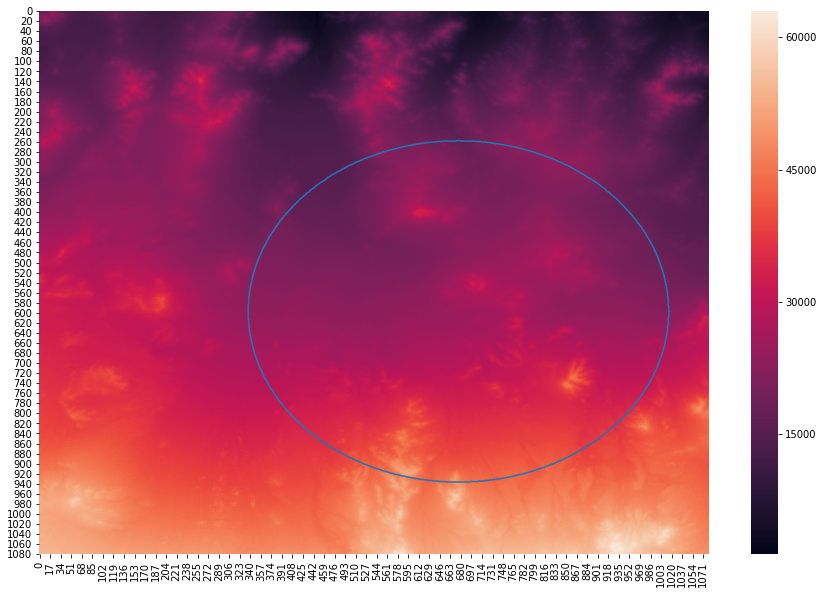

In [163]:
plt.figure(figsize=(15, 10))
sns.heatmap(map_)
plt.plot(df.x, df.y)
plt.show()

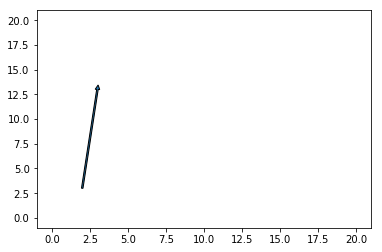

In [121]:
plt.arrow(2, 3, 1, 10, width=0.1)
plt.plot(20, 20)
plt.plot(0, 0)